In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv('../data/heart_failure_records.csv')

In [46]:
results = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['DEATH_EVENT', 'time']), data['DEATH_EVENT'], test_size=0.2)
    rf = RandomForestClassifier(n_estimators=500)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    results.append(roc_auc_score(y_test, y_pred))

In [65]:
roc_curve(y_test, y_pred)

(array([0.        , 0.20930233, 1.        ]),
 array([0.        , 0.35294118, 1.        ]),
 array([2, 1, 0]))

In [49]:
print(np.mean(results))
print(np.max(results))

0.6679835295257852
0.8333333333333334


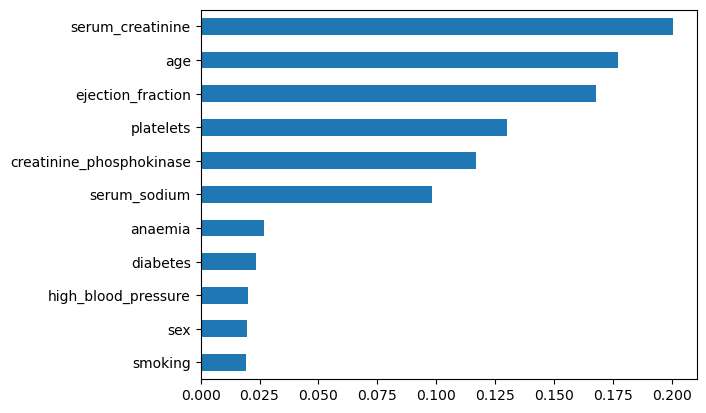

In [60]:
rf_importance_1 = pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_
).sort_values()

rf_importance_1.plot(kind='barh')

plt.show()

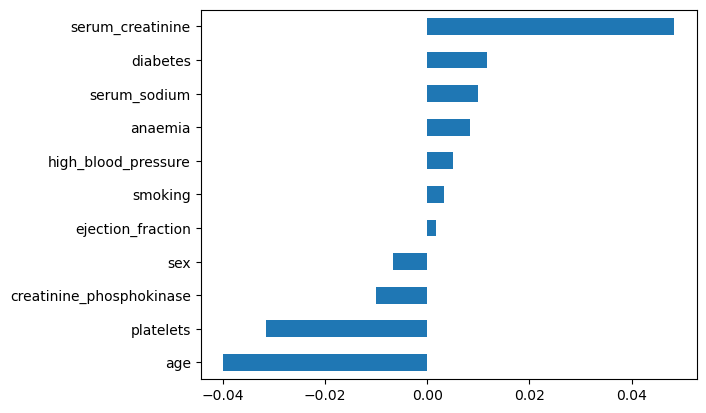

In [61]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=123)
rf_importance_2 = pd.Series(result.importances_mean, index=rf.feature_names_in_).sort_values()
rf_importance_2.plot(kind='barh')
plt.show()

Issues with reproducing:

There is no information on hyperparameter tuning of Random Forest classifier. The authors are aware of the concept, since they apply tuning to SVM and Multi-layer Perceptron, but mention Random Forest with other methods that do not require tuning, such as Logistic Regression. This implies that authors used default hyperparameters specified in the `randomForest` R package.

Based on this we can deduce that the hyperparameters are:
- number of trees: 500
- fraction of features sampled at each split: $\sqrt n$, where $n$ is the number of features
- fraction of observation sampled at each split: 1 
- maximum leaf nodes in each tree: unlimited
- minimum size of terminal nodes / minimum samples in a leaf: 1

It should be noted that while the default hyperparameter for `scikit-learn` implementation of Random Forest classifier are mostly the same, the most important hyperparameter, the number of trees grown, is different: 100. This can be only deduced from the code made available by the researchers and is not stated in the paper.